# Homework
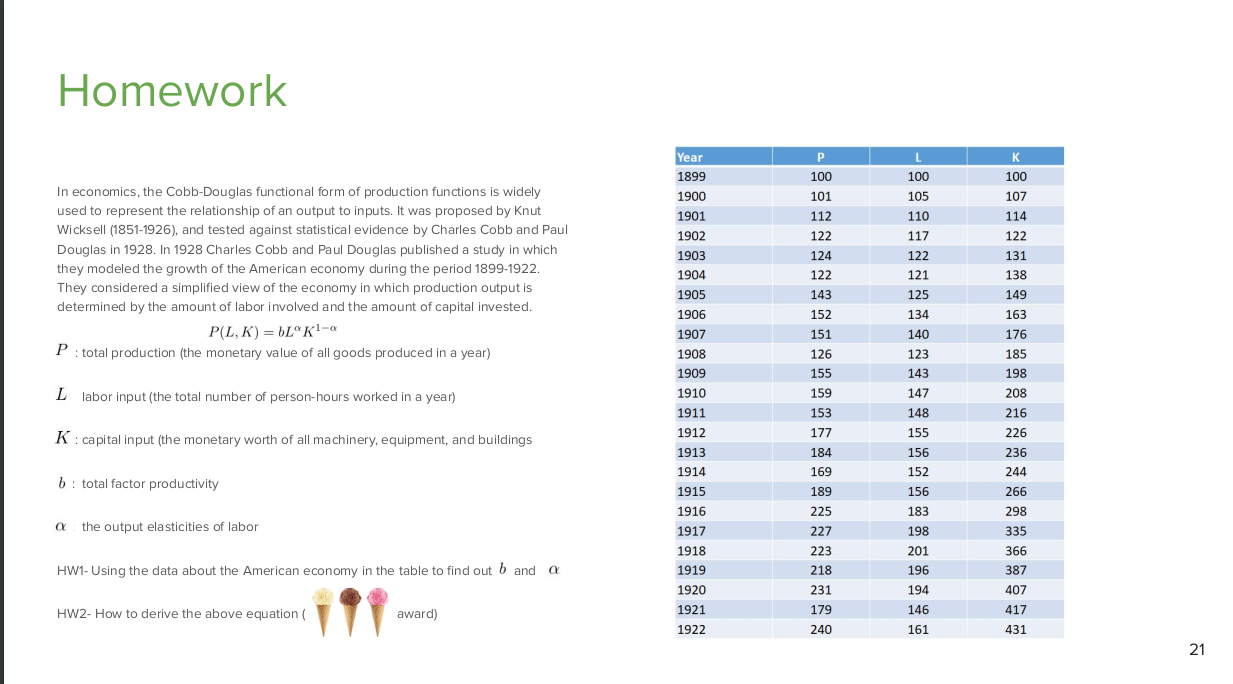


In [119]:
import numpy as np
import pandas as pd
import tensorflow as tf

#Read data
data_df = pd.read_excel('cobbdouglas_edit.xls')
# print(data_df[4:10])

P_data = data_df['Relative Capital Stock, 1899=100'].values
L_data = data_df['Relative Number of Workers, 1899=100'].values
K_data = data_df['Index of Manufactures'].values

L_data = np.asarray(L_data)
K_data = np.asarray(K_data)
P_data = np.asarray(P_data)

n_samples = P_data.shape[0]
learning_rate = 0.000001
training_epochs = 10000
display_step = 1000

In [120]:
Y = tf.placeholder(tf.float32, name='K')
L = tf.placeholder(tf.float32, name='L')
K = tf.placeholder(tf.float32, name='y')

b = tf.Variable(0, dtype=tf.float32)
alpha = tf.Variable(0, dtype=tf.float32)


In [121]:
Y_predict = b*(tf.pow(L, alpha)*tf.pow(K, 1-alpha))

cost = tf.reduce_sum(tf.square(Y_predict - Y))/(2*n_samples)

optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

In [122]:
with tf.Session() as sess:
    # Step 7: initialize the necessary variables, in this case, w and b
    sess.run(tf.global_variables_initializer())
    
    for i in range(training_epochs):
        _, cost_m = sess.run([optimizer, cost], feed_dict={L:L_data, K:K_data, Y:P_data})
                    
        if(i+1)%display_step == 0:
            print('Epoch {0}: {1}'.format(i+1, cost_m))
        
    alpha_out, b_out = sess.run([alpha,b])
    print(alpha_out, b_out)

Epoch 1000: 1160.816162109375
Epoch 2000: 1102.128662109375
Epoch 3000: 1086.0692138671875
Epoch 4000: 1081.91259765625
Epoch 5000: 1080.86669921875
Epoch 6000: 1080.6075439453125
Epoch 7000: 1080.54345703125
Epoch 8000: 1080.5283203125
Epoch 9000: 1080.5242919921875
Epoch 10000: 1080.523193359375
-1.0394095 1.2446915
